Importing the required libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Preprocessing

In [3]:
# loading the csv data to pandas dataframe
gold_data = pd.read_csv('/content/drive/MyDrive/Datasets/gold/gld_price_data.csv')

In [4]:
## print first 5 rows 
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
#print last five rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# shape of dataset
gold_data.shape

(2290, 6)

In [7]:
## getting some basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
## checking the number of missing values 
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
## statistical measure of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1. Positive Correlation

2. Negative Correlation

In [11]:
correlation = gold_data.corr()
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


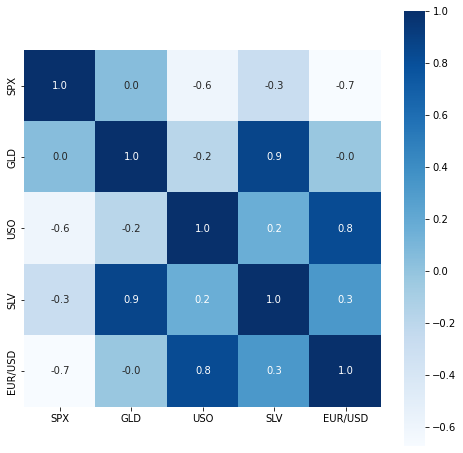

In [19]:
## constructing a heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Blues')

In [20]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


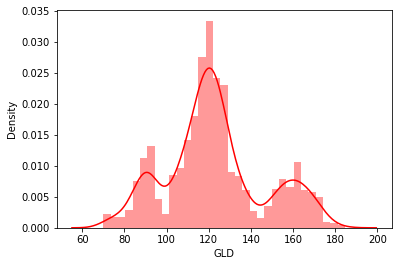

In [34]:
# checking the distribution of GLD Price
sns.distplot(gold_data['GLD'], color='red')

Splitting the Features and Target

In [22]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [23]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [24]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the Training data and Test Data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

Model Training: Random Forest Regressor


In [26]:
regressor = RandomForestRegressor()

In [27]:
# training the model
regressor.fit(X_train, Y_train) 

RandomForestRegressor()

Model Evaluation

In [29]:
# Prediction on the Test Data
test_data_prediction = regressor.predict(X_test)

In [30]:
print(test_data_prediction)

[168.66489959  82.04809987 116.18889989 127.60320102 120.6370009
 154.50029751 150.27079812 126.25380016 117.5810988  126.08780072
 116.69850129 171.74220076 141.63989844 167.42949811 115.20450002
 117.79180062 138.5179033  170.04120124 159.60380318 158.08299948
 155.19410025 125.29090016 176.14749903 157.27800386 125.35980037
  93.86989982  77.11510016 120.24479988 119.07019971 167.38880048
  87.89640056 125.19570002  90.94950073 117.57710044 121.19609951
 136.33420082 115.65140118 115.20730092 148.40259983 107.11830068
 104.6849028   87.06079778 126.57930028 118.09649959 153.22899905
 119.58299987 108.37970013 108.29909845  93.29490022 127.15419781
  74.18100043 113.61959861 121.1132001  111.21559888 118.88739917
 120.39839956 159.26510018 167.90750121 147.01119656  85.92069865
  94.22900038  86.79389859  90.44050009 118.93540076 126.42040073
 127.48150004 169.74619961 122.37689936 117.50819874  98.6135005
 168.39590091 143.25019874 131.66900253 121.29220208 121.4460994
 119.66510078

Compare the Actual Values and Predicted Values in a Plot

In [31]:
Y_test = list(Y_test)

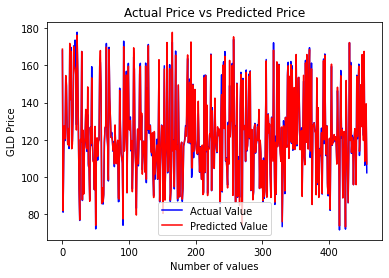

In [32]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()